In [1]:
# 의존성 설치
!pip install nltk

import numpy as np
from nltk.tokenize import word_tokenize
import nltk

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')

# 말뭉치 정의
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "the lazy dog sleeps while the fox jumps",
    "quick foxes climb steep hills"
]

# 토큰화
tokenized_corpus = [word_tokenize(s.lower()) for s in corpus]
vocab = sorted(set(word for s in tokenized_corpus for word in s))
word2idx = {word: idx for idx, word in enumerate(vocab)}

# 가중치 동시출현 행렬 생성 함수
def build_weighted_cooc_matrix(tokenized_corpus, vocab, window_size, weight_type):
    cooc_matrix = np.zeros((len(vocab), len(vocab)))
    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    distance = abs(i - j)
                    weight = 1 if weight_type == 'uniform' else 1/distance if weight_type == 'linear' else np.exp(-distance)
                    cooc_matrix[word2idx[word]][word2idx[sentence[j]]] += weight
    return cooc_matrix

# 행렬 생성
window_size = 3
weight_types = ['uniform', 'linear', 'exponential']
weighted_matrices = {}
for wt in weight_types:
    weighted_matrices[wt] = build_weighted_cooc_matrix(tokenized_corpus, vocab, window_size, wt)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JU

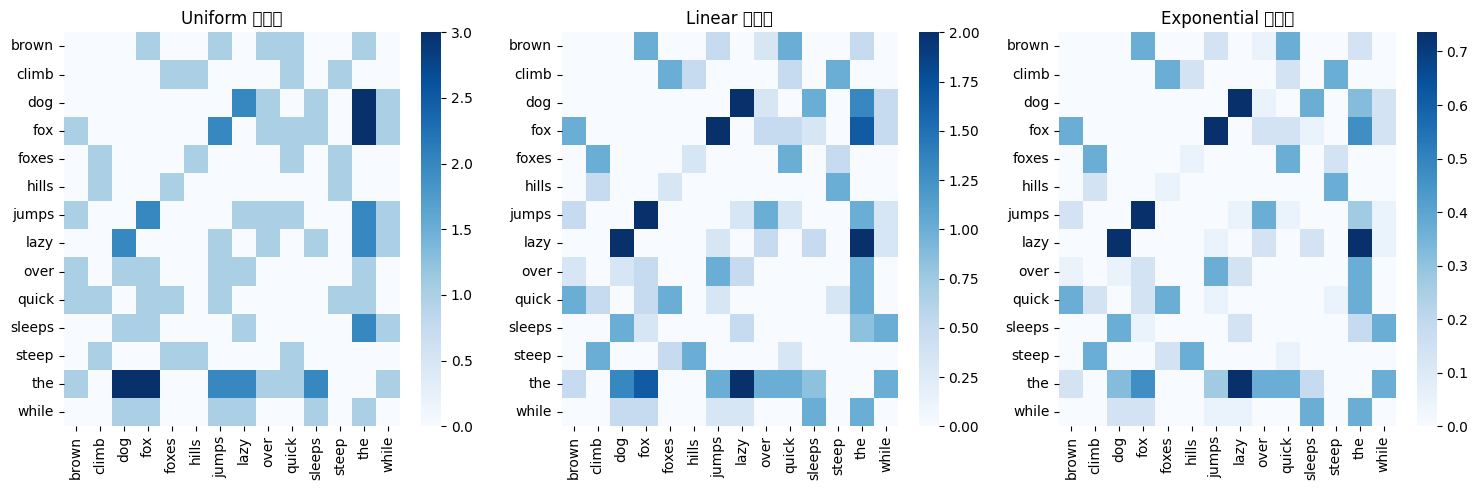


연습 2 분석:
- 균일 가중치: 모든 동시출현이 동일한 무게, 행렬 균형.
- 선형 감소: 가까운 단어(예: "quick"과 "brown")에 높은 가중치, 지역 관계 강조.
- 지수 감소: 거리 증가에 따라 가중치 급감, 인접 단어 강조.
선형 감소는 범용 임베딩에 적합, 지수 감소는 구문 분석에 유용.



In [2]:
# 의존성 설치
!pip install nltk seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')

# 말뭉치 정의
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "the lazy dog sleeps while the fox jumps",
    "quick foxes climb steep hills"
]

# 토큰화
tokenized_corpus = [word_tokenize(s.lower()) for s in corpus]
vocab = sorted(set(word for s in tokenized_corpus for word in s))
word2idx = {word: idx for idx, word in enumerate(vocab)}

# 가중치 동시출현 행렬 생성 함수
def build_weighted_cooc_matrix(tokenized_corpus, vocab, window_size, weight_type):
    cooc_matrix = np.zeros((len(vocab), len(vocab)))
    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    distance = abs(i - j)
                    weight = 1 if weight_type == 'uniform' else 1/distance if weight_type == 'linear' else np.exp(-distance)
                    cooc_matrix[word2idx[word]][word2idx[sentence[j]]] += weight
    return cooc_matrix

# 행렬 생성
window_size = 3
weight_types = ['uniform', 'linear', 'exponential']
weighted_matrices = {}
for wt in weight_types:
    weighted_matrices[wt] = build_weighted_cooc_matrix(tokenized_corpus, vocab, window_size, wt)

# 히트맵 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, wt in enumerate(weight_types):
    sns.heatmap(weighted_matrices[wt], ax=axes[i], xticklabels=vocab, yticklabels=vocab, cmap='Blues')
    axes[i].set_title(f'{wt.capitalize()} 가중치')
plt.tight_layout()
plt.savefig('weighting_comparison.png')
plt.show()

# 분석 출력
print("""
연습 2 분석:
- 균일 가중치: 모든 동시출현이 동일한 무게, 행렬 균형.
- 선형 감소: 가까운 단어(예: "quick"과 "brown")에 높은 가중치, 지역 관계 강조.
- 지수 감소: 거리 증가에 따라 가중치 급감, 인접 단어 강조.
선형 감소는 범용 임베딩에 적합, 지수 감소는 구문 분석에 유용.
""")